In [ ]:


!pip install ta finta 
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=d85c37ada8569c424855645f8f93cdcb8193daa77d087e36f791f7632d10be09
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta
Selecting previously unselected package libta-lib0.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 269 kB 31.2 MB/s 
  Created wheel for ta-lib: filenam

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import itertools
import sklearn
import keras
import time
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.models import Sequential
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, CuDNNLSTM, Conv1D
from matplotlib import pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from ta.momentum import RSIIndicator
from finta import TA
from ta.volatility import BollingerBands
import ta
from ta.trend import MACD
import talib

In [ ]:
df = pd.read_csv('/content/banknifty_15min.csv')
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,39763.800781,0
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,39849.800781,0
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,39808.148438,0
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,39898.601562,0
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,39790.601562,0
...,...,...,...,...,...,...,...
964,2021-12-14 14:15:00+05:30,36859.101562,36860.898438,36777.250000,36778.398438,36778.398438,0
965,2021-12-14 14:30:00+05:30,36779.449219,36866.398438,36772.500000,36816.800781,36816.800781,0
966,2021-12-14 14:45:00+05:30,36816.800781,36896.601562,36787.601562,36849.250000,36849.250000,0
967,2021-12-14 15:00:00+05:30,36851.449219,36912.199219,36851.449219,36886.699219,36886.699219,0


In [ ]:
df.Datetime.describe()

count                           969
unique                          969
top       2021-10-18 11:45:00+05:30
freq                              1
Name: Datetime, dtype: object

In [ ]:
df.head(10)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,39763.800781,0
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,39849.800781,0
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,39808.148438,0
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,39898.601562,0
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,39790.601562,0
5,2021-10-18 13:00:00+05:30,39793.000000,39840.699219,39736.699219,39742.199219,39742.199219,0
6,2021-10-18 13:15:00+05:30,39744.898438,39754.601562,39637.199219,39695.699219,39695.699219,0
7,2021-10-18 13:30:00+05:30,39698.601562,39761.300781,39684.101562,39749.898438,39749.898438,0
8,2021-10-18 13:45:00+05:30,39749.148438,39798.050781,39708.699219,39759.050781,39759.050781,0
9,2021-10-18 14:00:00+05:30,39754.449219,39835.898438,39716.000000,39814.949219,39814.949219,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   969 non-null    object 
 1   Open       969 non-null    float64
 2   High       969 non-null    float64
 3   Low        969 non-null    float64
 4   Close      969 non-null    float64
 5   Adj Close  969 non-null    float64
 6   Volume     969 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.1+ KB


In [ ]:
from talib import abstract
from talib.abstract import *

In [ ]:
indicator_rsi = RSIIndicator(close=df["Close"])
df['rsi'] = indicator_rsi.rsi()

df['ema_30'] = EMA(df["Close"], timeperiod=30)

df['sma_10'] = SMA(df["Close"], timeperiod=10)


In [ ]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,rsi,ema_30,sma_10
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,39763.800781,0,NaN,NaN,NaN
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,39849.800781,0,NaN,NaN,NaN
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,39808.148438,0,NaN,NaN,NaN
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,39898.601562,0,NaN,NaN,NaN
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,39790.601562,0,NaN,NaN,NaN


In [ ]:
#get the Buy and Sell Signals

df['signal'] = np.where(df['ema_30'] < df['sma_10'],1,0)
df['position'] = df['signal'].diff()

In [ ]:
df['MA_buy'] = np.where(df['position'] == 1,df['Close'],np.NAN)
df['MA_sell'] = np.where(df['position'] == -1,df['Close'],np.NAN)

df.tail(30)

,Datetime,Open,High,Low,Close,Adj Close,Volume,rsi,ema_30,sma_10,signal,position,MA_buy,MA_sell
939,2021-12-13 14:15:00+05:30,36926.000000,36982.148438,36900.601562,36969.000000,36969.000000,0,37.881441,37172.421333,37108.929688,0,0.0,NaN,NaN
940,2021-12-13 14:30:00+05:30,36968.449219,37045.500000,36953.601562,37017.699219,37017.699219,0,41.272447,37162.439261,37062.744531,0,0.0,NaN,NaN
941,2021-12-13 14:45:00+05:30,37016.949219,37061.398438,36948.398438,36950.148438,36950.148438,0,38.160618,37148.743079,37039.484375,0,0.0,NaN,NaN
942,2021-12-13 15:00:00+05:30,36945.148438,36954.000000,36863.601562,36906.050781,36906.050781,0,36.239696,37133.085511,37007.149609,0,0.0,NaN,NaN
943,2021-12-13 15:15:00+05:30,36902.199219,36991.000000,36897.101562,36962.199219,36962.199219,0,40.356537,37122.060589,36998.654687,0,0.0,NaN,NaN
944,2021-12-14 09:15:00+05:30,36778.949219,36783.699219,36595.398438,36736.351562,36736.351562,0,31.536192,37097.176136,36967.414844,0,0.0,NaN,NaN
945,2021-12-14 09:30:00+05:30,36741.351562,36828.148438,36687.750000,36705.250000,36705.250000,0,30.546093,37071.890579,36927.800000,0,0.0,NaN,NaN
946,2021-12-14 09:45:00+05:30,36706.199219,36778.449219,36680.601562,36730.601562,36730.601562,0,32.408893,37049.871933,36886.865234,0,0.0,NaN,NaN
947,2021-12-14 10:00:00+05:30,36730.699219,36730.699219,36626.351562,36660.800781,36660.800781,0,30.021407,37024.770568,36856.570312,0,0.0,NaN,NaN
948,2021-12-14 10:15:00+05:30,36660.148438,36660.148438,36555.750000,36603.851562,36603.851562,0,28.196330,36997.614503,36824.195312,0,0.0,NaN,NaN


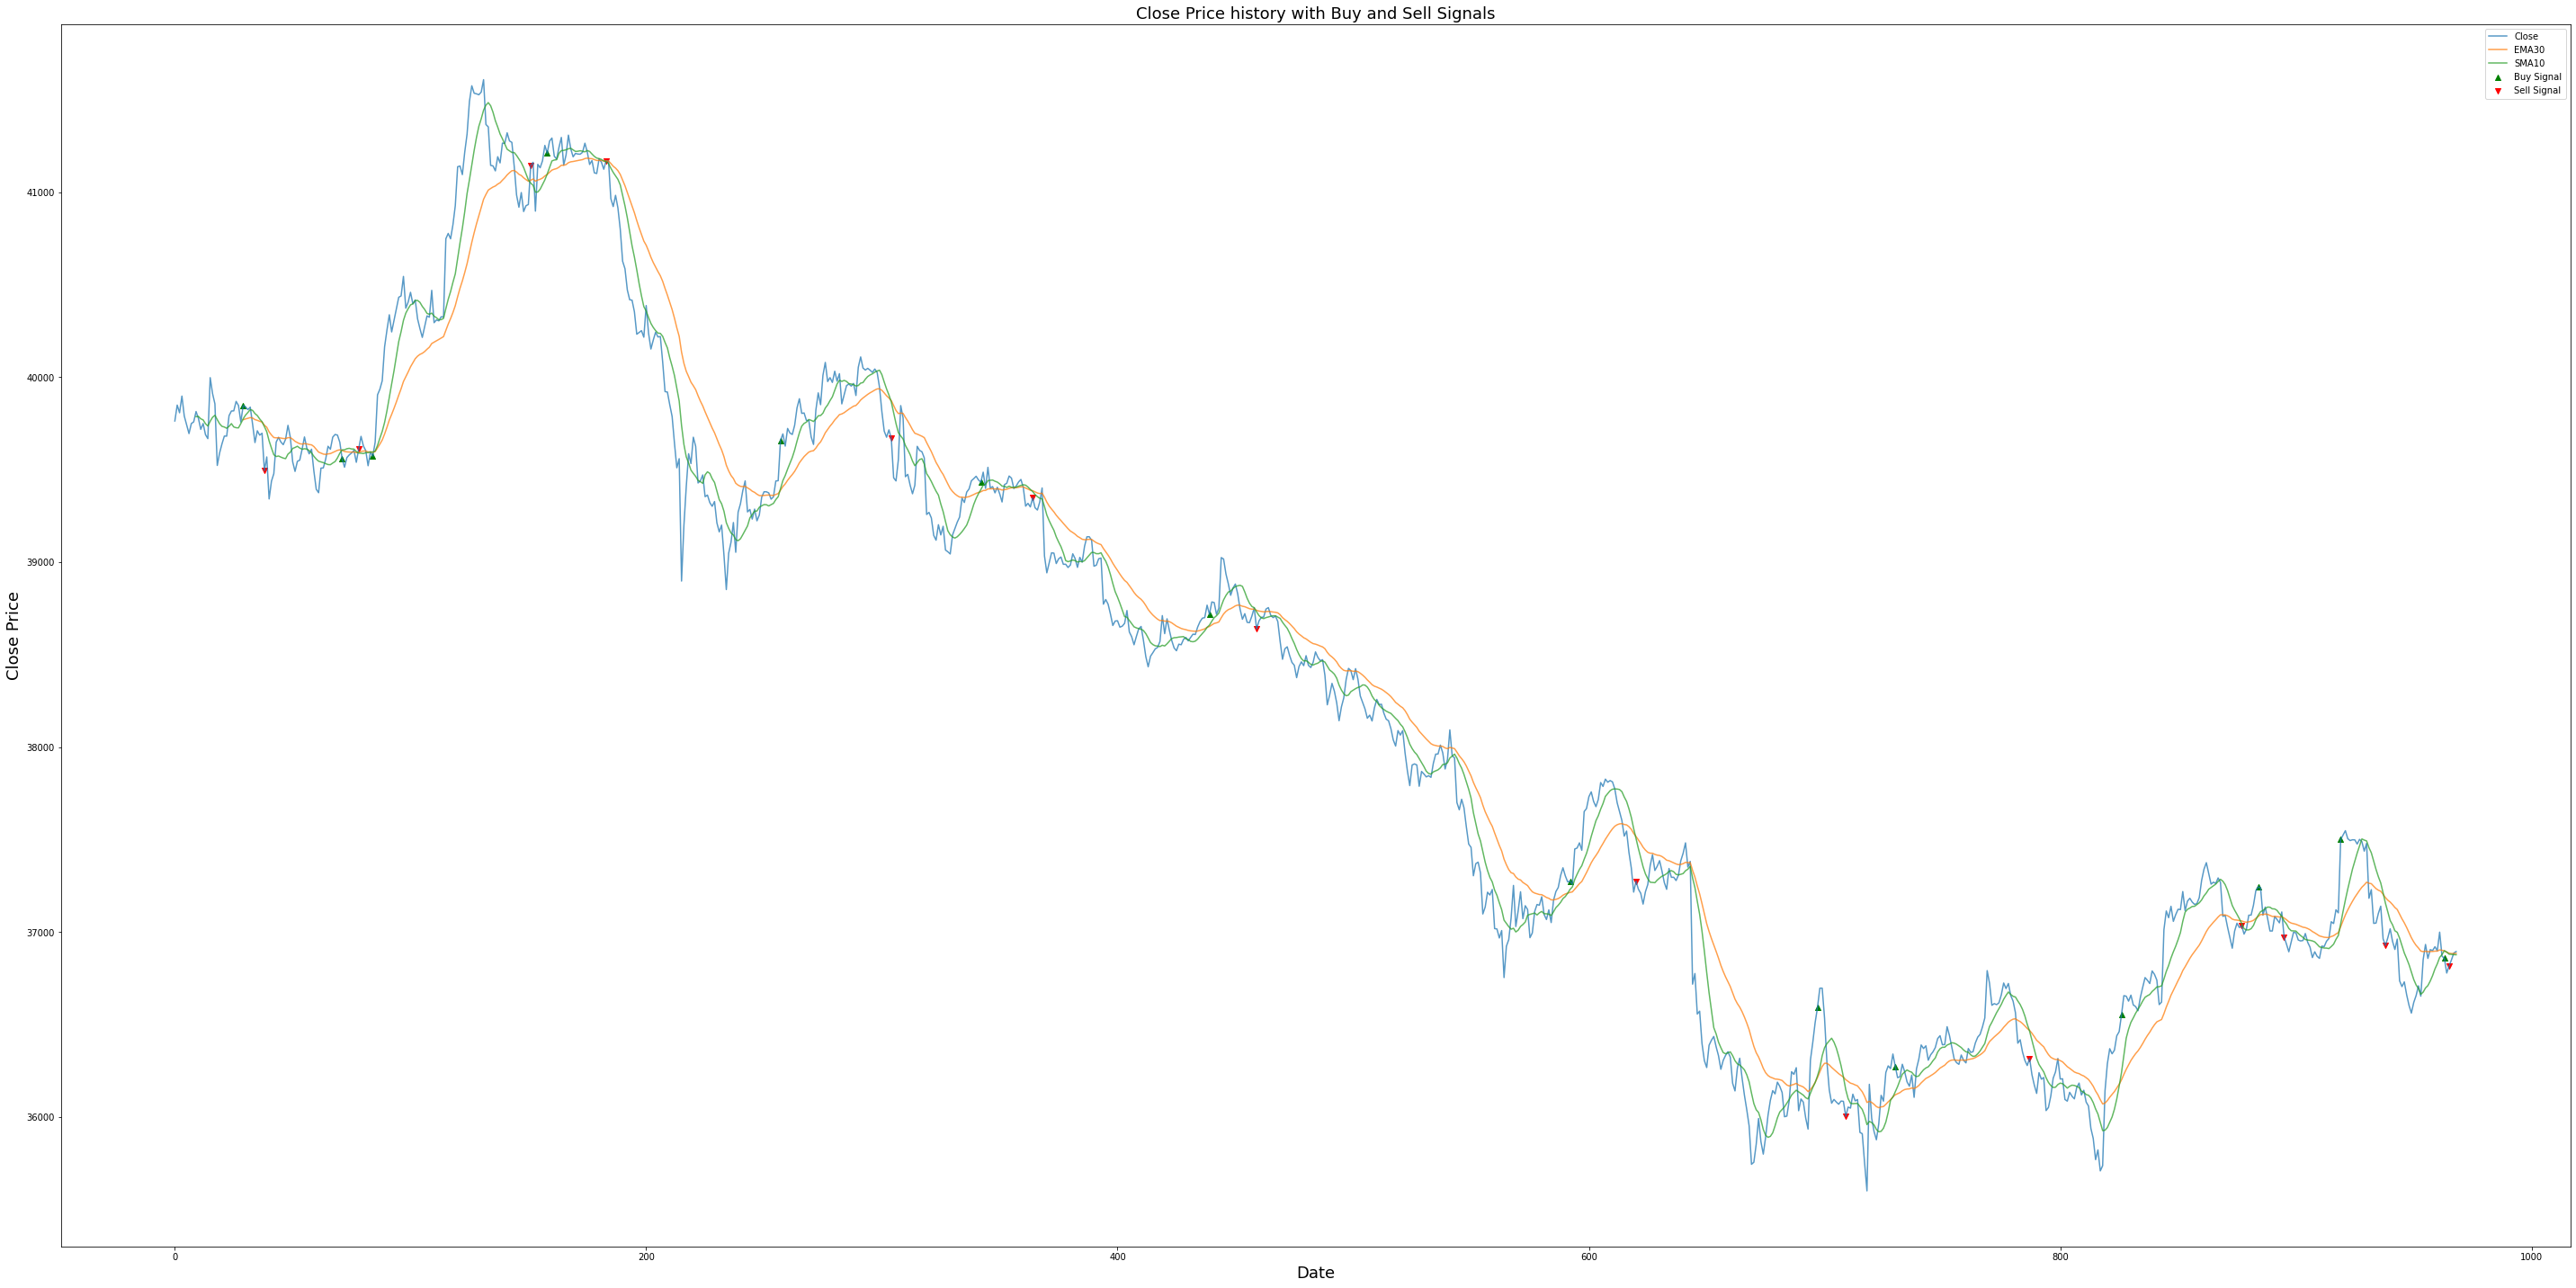

In [ ]:
#Visualize the close price with SMA with Buy and sell signal

plt.figure(figsize=(50,25))
plt.title('Close Price history with Buy and Sell Signals', fontsize = 18)
plt.plot(df['Close'], alpha = 0.75, label = 'Close')
plt.plot(df['ema_30'], alpha = 0.75, label = 'EMA30')
plt.plot(df['sma_10'], alpha = 0.75, label = 'SMA10')
plt.scatter(df.index, df['MA_buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['MA_sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.legend()
plt.show()

In [ ]:
df['R_sell']=np.where(df['rsi']<=35,df['Close'],np.NAN) 
df['R_buy']=np.where(df['rsi']>=50,df['Close'],np.NAN)  

In [ ]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,rsi,ema_30,sma_10,signal,position,MA_buy,MA_sell,R_sell,R_buy
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,39763.800781,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,39849.800781,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,39808.148438,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,39898.601562,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,39790.601562,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2021-12-14 14:15:00+05:30,36859.101562,36860.898438,36777.250000,36778.398438,36778.398438,0,43.844641,36890.877008,36892.120313,1,0.0,NaN,NaN,NaN,NaN
965,2021-12-14 14:30:00+05:30,36779.449219,36866.398438,36772.500000,36816.800781,36816.800781,0,46.301627,36886.097896,36880.500391,0,-1.0,NaN,36816.800781,NaN,NaN
966,2021-12-14 14:45:00+05:30,36816.800781,36896.601562,36787.601562,36849.250000,36849.250000,0,48.357744,36883.720613,36879.670312,0,0.0,NaN,NaN,NaN,NaN
967,2021-12-14 15:00:00+05:30,36851.449219,36912.199219,36851.449219,36886.699219,36886.699219,0,50.703723,36883.912781,36877.830078,0,0.0,NaN,NaN,NaN,36886.699219


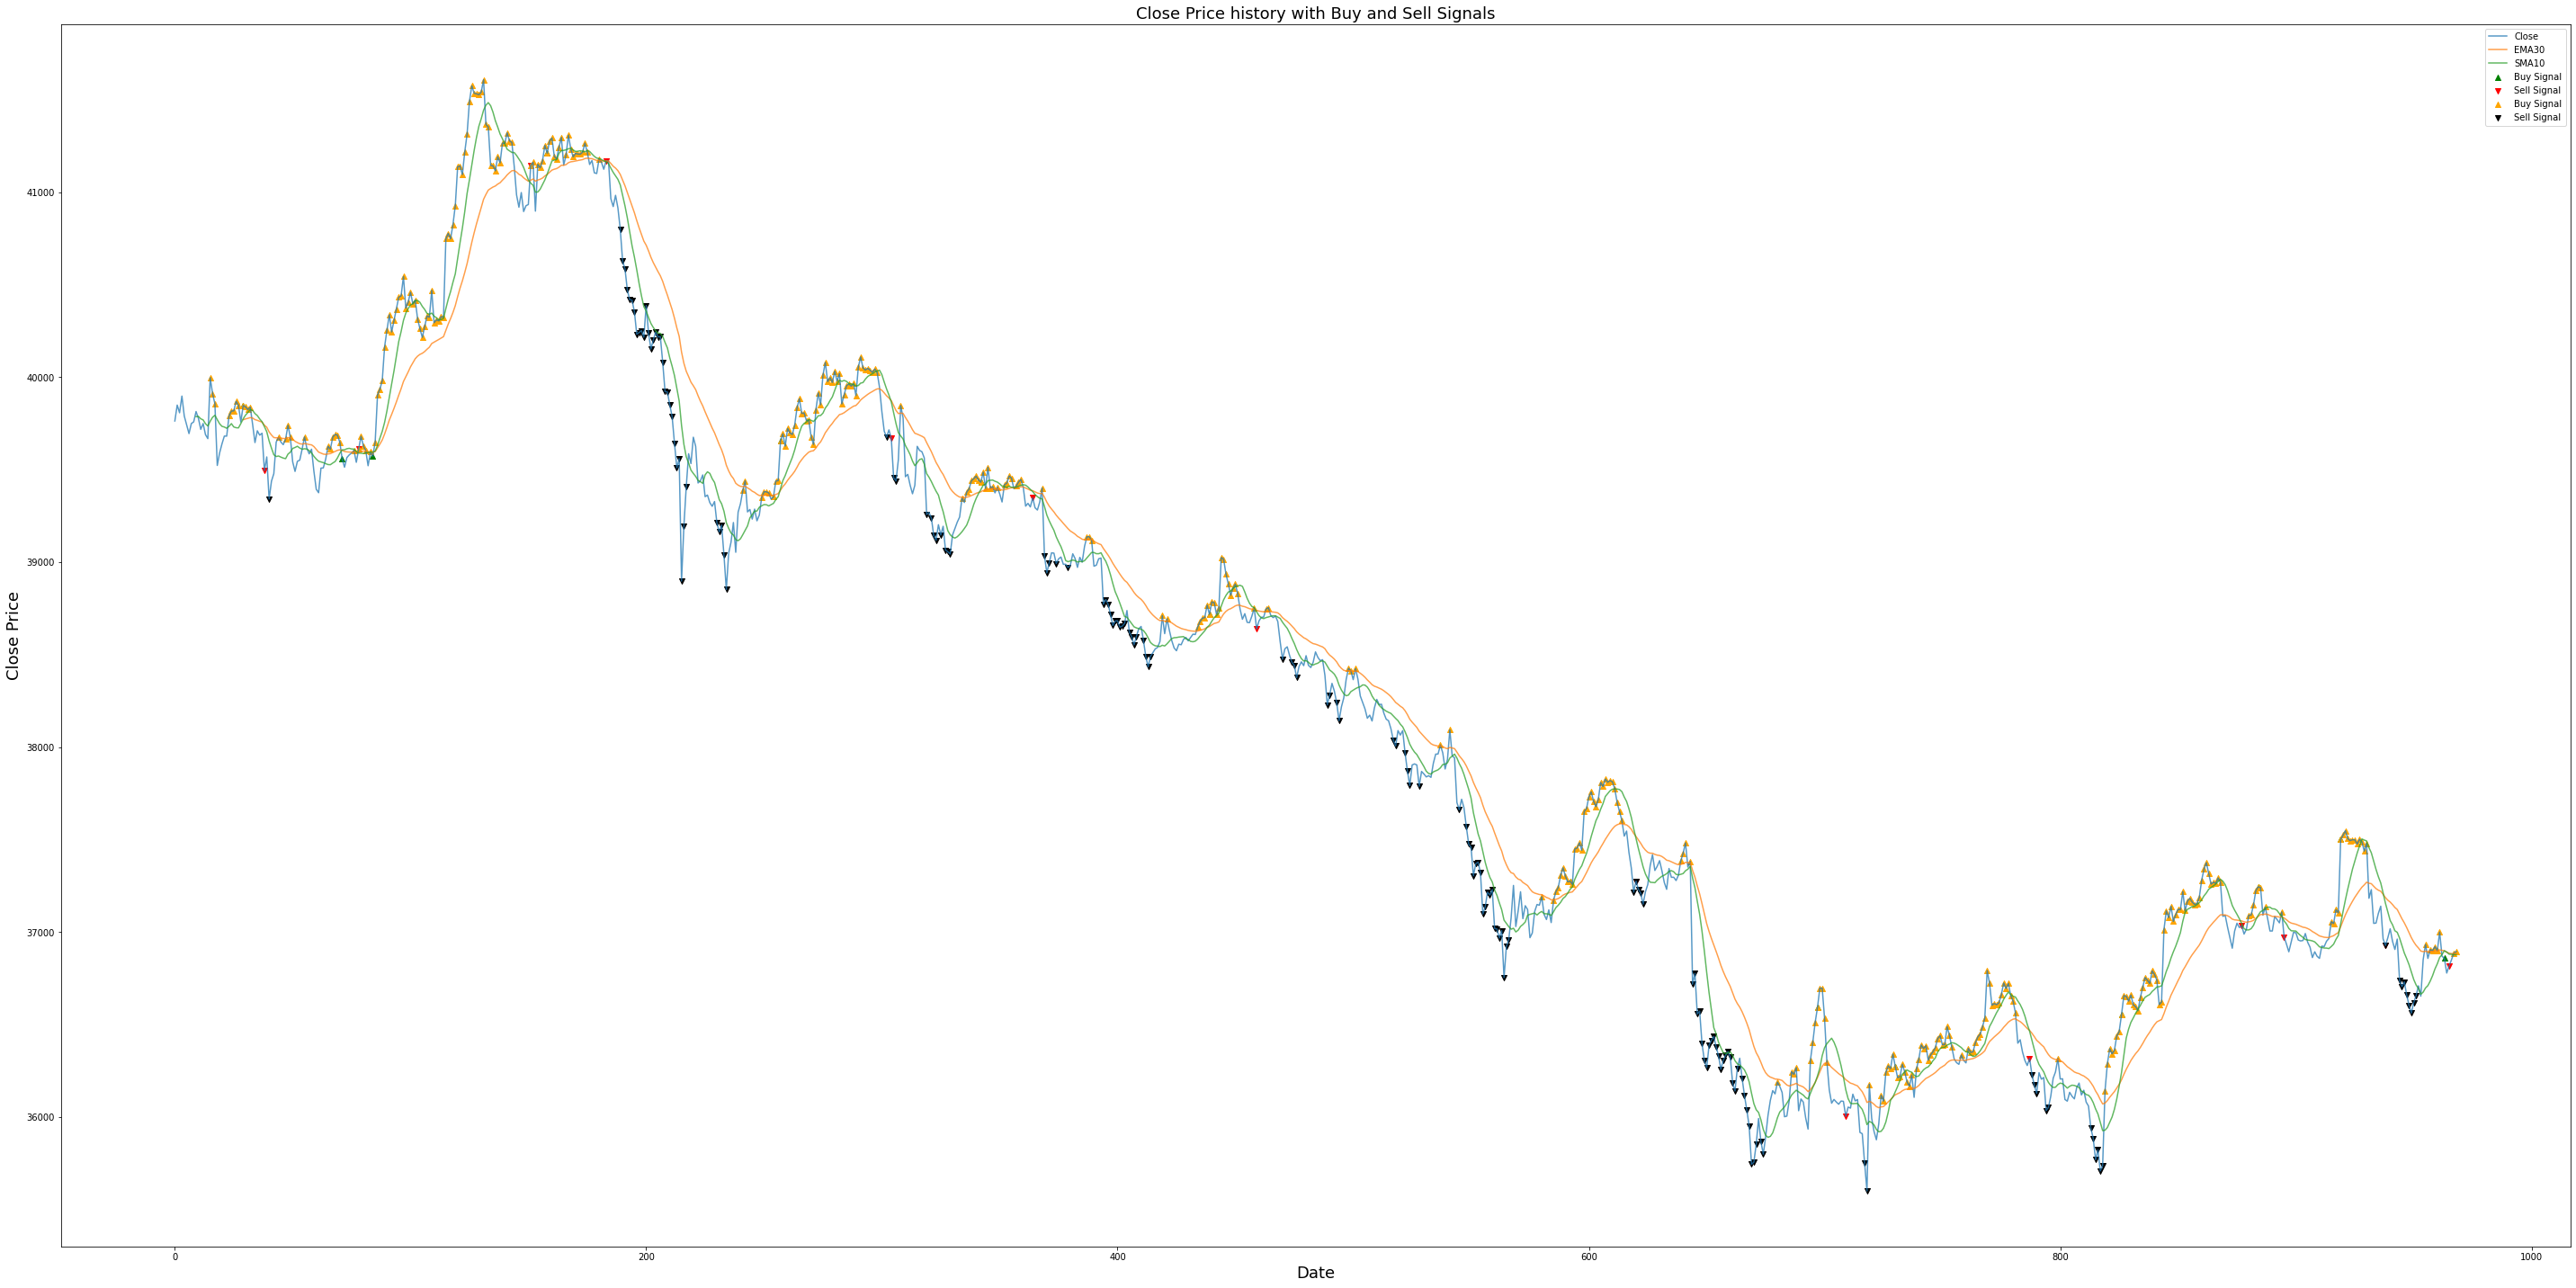

In [ ]:
plt.figure(figsize=(50,25))
plt.title('Close Price history with Buy and Sell Signals', fontsize = 18)
plt.plot(df['Close'], alpha = 0.75, label = 'Close')
plt.plot(df['ema_30'], alpha = 0.75, label = 'EMA30')
plt.plot(df['sma_10'], alpha = 0.75, label = 'SMA10')
plt.scatter(df.index, df['MA_buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['MA_sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.scatter(df.index, df['R_buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'orange')
plt.scatter(df.index, df['R_sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'black')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.legend()
plt.show()

In [ ]:
df['Sell'] = np.where(df['MA_sell']==df['R_sell'],df['Close'],np.NaN)
df['Buy'] = np.where(df['MA_buy']==df['R_buy'],df['Close'],np.NaN)

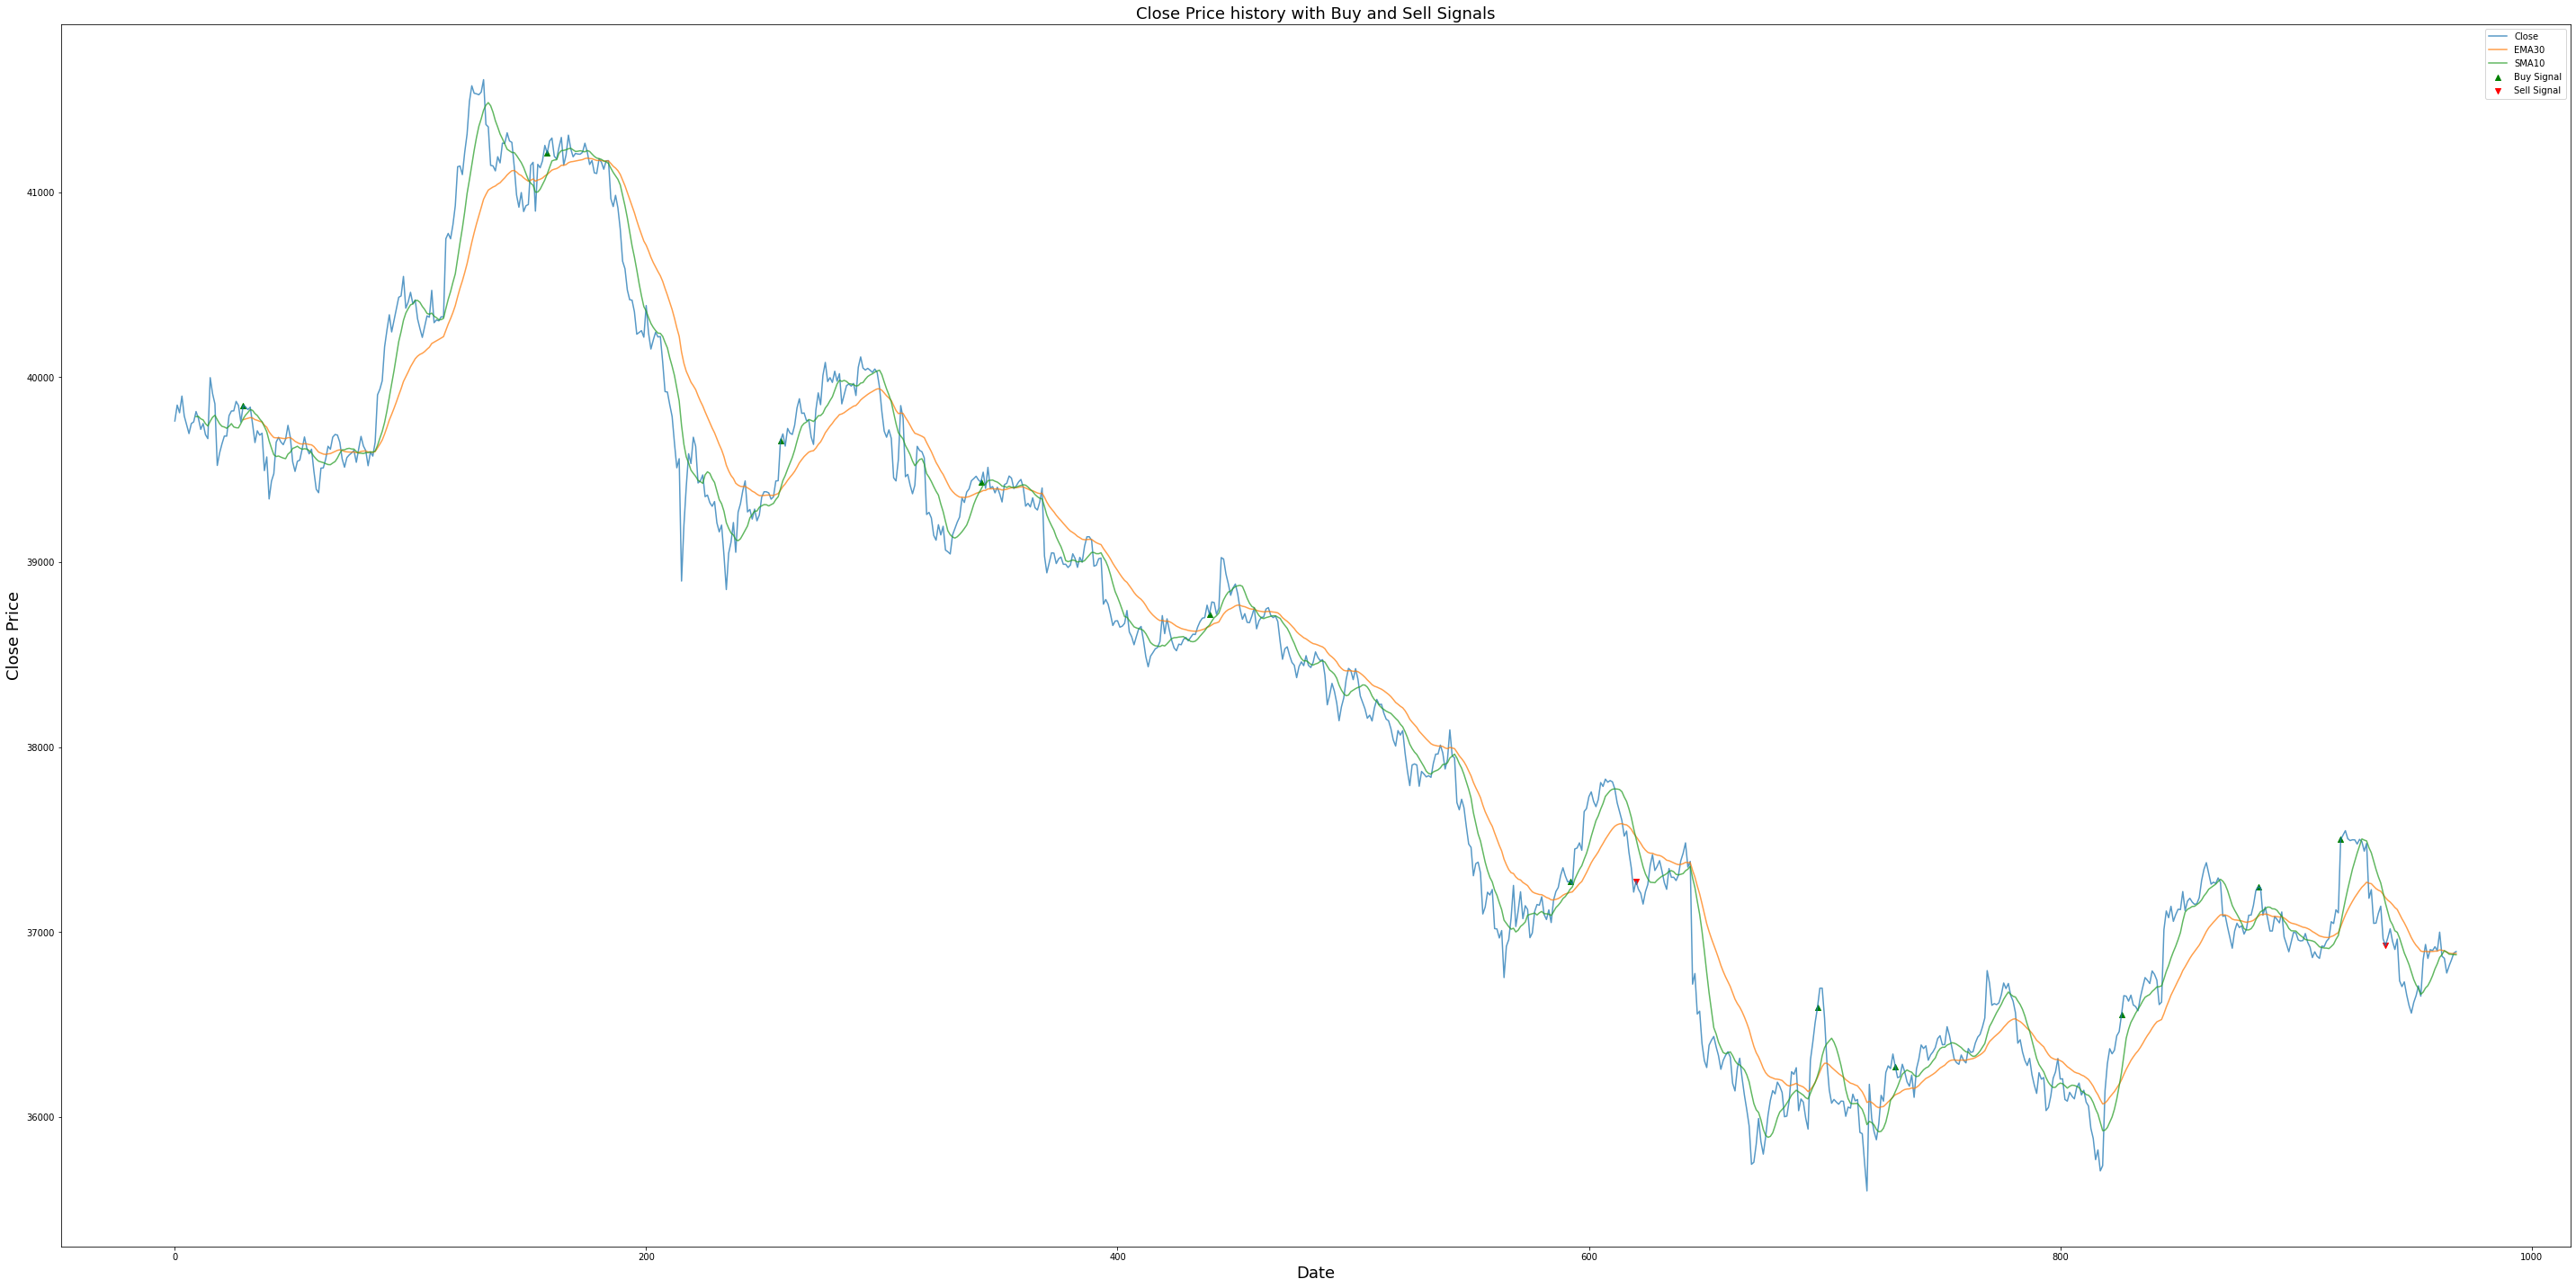

In [ ]:
plt.figure(figsize=(50,25))
plt.title('Close Price history with Buy and Sell Signals', fontsize = 18)
plt.plot(df['Close'], alpha = 0.75, label = 'Close')
plt.plot(df['ema_30'], alpha = 0.75, label = 'EMA30')
plt.plot(df['sma_10'], alpha = 0.75, label = 'SMA10')
plt.scatter(df.index, df['Buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.legend()
plt.show()




In [ ]:
df['Sell'] = np.where(df['MA_sell']==df['R_sell'],'Sell','Hold')
df['Buy'] = np.where(df['MA_buy']==df['R_buy'],'Buy','Hold')

In [ ]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,rsi,ema_30,sma_10,signal,position,MA_buy,MA_sell,R_sell,R_buy,Sell,Buy
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,39763.800781,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Hold,Hold
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,39849.800781,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,Hold,Hold
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,39808.148438,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,Hold,Hold
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,39898.601562,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,Hold,Hold
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,39790.601562,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,Hold,Hold


In [ ]:
df['Buy/Sell']=df['Sell'] + df['Buy']
df['Buy/Sell'] = df['Buy/Sell'].replace('HoldHold',0)
df['Buy/Sell'] = df['Buy/Sell'].replace('HoldBuy',1)
df['Buy/Sell'] = df['Buy/Sell'].replace('SellHold',2)

In [ ]:
df = df.drop(['Adj Close','Volume','signal','position','Sell','Buy'],1)
df1 = df.replace(np.nan,0)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Datetime,Open,High,Low,Close,rsi,ema_30,sma_10,MA_buy,MA_sell,R_sell,R_buy,Buy/Sell
0,2021-10-18 11:45:00+05:30,39742.550781,39771.800781,39724.148438,39763.800781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2021-10-18 12:00:00+05:30,39763.300781,39868.449219,39748.148438,39849.800781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2021-10-18 12:15:00+05:30,39850.800781,39865.101562,39779.050781,39808.148438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2021-10-18 12:30:00+05:30,39811.601562,39932.250000,39802.898438,39898.601562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2021-10-18 12:45:00+05:30,39900.398438,39947.300781,39779.648438,39790.601562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
X = df1.iloc[:,1:12]
Y = df1.iloc[:,12]

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [ ]:
probability = model.predict_proba(X_test)
print (probability)

[[9.99976527e-01 1.17627121e-05 1.17106113e-05]
 [9.99960277e-01 3.59312808e-05 3.79193603e-06]
 [9.99996037e-01 1.71072301e-06 2.25236161e-06]
 [9.99939316e-01 3.25652285e-05 2.81187245e-05]
 [9.99921201e-01 6.84049354e-05 1.03943371e-05]
 [9.99359507e-01 5.73582117e-04 6.69104688e-05]
 [9.99935953e-01 3.31395336e-05 3.09077600e-05]
 [9.99358714e-01 5.82864869e-04 5.84210417e-05]
 [9.99853502e-01 1.11508033e-05 1.35347207e-04]
 [9.99461197e-01 4.24558681e-05 4.96347445e-04]
 [9.99964711e-01 3.09876247e-05 4.30182290e-06]
 [9.99680845e-01 2.78910582e-04 4.02446190e-05]
 [9.99988810e-01 4.56058810e-06 6.62944242e-06]
 [9.99936830e-01 3.27119708e-05 3.04583359e-05]
 [9.98678649e-01 1.20701818e-04 1.20064909e-03]
 [9.99337484e-01 5.82055870e-04 8.04596671e-05]
 [9.99394469e-01 5.25509937e-04 8.00213771e-05]
 [9.99962636e-01 3.27106793e-05 4.65288362e-06]
 [9.99978845e-01 1.08403925e-05 1.03148454e-05]
 [9.99946090e-01 2.68340119e-05 2.70760103e-05]
 [9.99959667e-01 3.53396499e-05 4.993183

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[237   1   0]
 [  0   4   0]
 [  0   0   1]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1

    accuracy                           1.00       243
   macro avg       0.93      1.00      0.96       243
weighted avg       1.00      1.00      1.00       243



In [ ]:
print(model.score(X_test,y_test))


0.9958847736625515
